In [6]:
import pandas as pd
import json
import warnings
from scipy.stats import shapiro
import statistics
from scipy.stats import shapiro, mannwhitneyu, kruskal, chisquare
from scipy.stats import shapiro
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

with open('finalStatistics.json', 'r') as f:
    data = json.load(f)

data = data["groups"]
df = pd.DataFrame.from_dict(data)

0E7Z4crR
9Ajj0aHc
B0dEm4FD
ZybrH8MD


In [7]:
# Json -> pandas
scores = pd.DataFrame(columns = ["levenshteins", "strength", "group"])
i = 0
for group in df.columns:
    i += 1
    group_name = str(i)
    total_users = df[group]["totalUsersSubmitted"]
    levenshteins = df[group]["levenshteins"]
    scores_list = df[group]["scores"]
    for j in range(len(levenshteins)):
        row = pd.DataFrame({"levenshteins": levenshteins[j], "strength": scores_list[j], "group": group_name}, index=[total_users])
        scores = scores.append(row, ignore_index=True)
scores = scores.sort_values(by=["group", "levenshteins"])

In [2]:
# OLD delete if runs for u
# # Json -> pandas
# scores = pd.DataFrame(columns = ["levenshteins", "strength", "group"])
# for i in range(1, 5):
#     group_name = df.iloc[i]["name"]
#     total_users = df.iloc[i]["totalUsersSubmitted"]
#     levenshteins = df.iloc[i]["levenshteins"]
#     scores_list = df.iloc[i]["scores"]
#     for j in range(len(levenshteins)):
#         row = pd.DataFrame({"levenshteins": levenshteins[j], "strength": scores_list[j], "group": group_name}, index=[total_users])
#         scores = scores.append(row, ignore_index=True)
# scores = scores.sort_values(by=["group", "levenshteins"])

KeyError: 'name'

In [9]:
# Clean up
scores.loc[:15, 'mode'] = 'Emoji'
scores.loc[15:, 'mode'] = 'Normal'
scores = scores.drop([1,6])
scores['levenshteins'] = pd.to_numeric(scores['levenshteins'], errors='coerce')

print(scores)

    levenshteins strength group    mode
2              0       83     1   Emoji
3              0      100     1   Emoji
4              0      100     1   Emoji
5              0      100     1   Emoji
0              2       88     1   Emoji
7              3       88     1   Emoji
8              0       79     2   Emoji
9              0       70     2   Emoji
12             0       65     2   Emoji
13             0       67     2   Emoji
14             0       76     2   Emoji
10             1       60     2   Emoji
11             1       45     2   Emoji
15             0       94     3  Normal
18             0       83     3  Normal
20             0       88     3  Normal
16             1       85     3  Normal
17             2       86     3  Normal
21             4       86     3  Normal
19             5       90     3  Normal
22             0       51     4  Normal
24             0       72     4  Normal
26             0       45     4  Normal
27             0       80     4  Normal


In [10]:
# Get mean and sd
mean_normal = scores[scores['mode'] == 'Normal']['levenshteins'].mean()
mean_emoji =scores[scores['mode'] == 'Emoji']['levenshteins'].mean()

print(mean_normal)
print(mean_emoji)

1.0769230769230769
0.5384615384615384


In [11]:
# Check normal distributioin


emoji_levenshteins = scores[scores['mode'] == 'Emoji']['levenshteins'].values
normal_levenshteins = scores[scores['mode'] == 'Normal']['levenshteins'].values

# perform Shapiro-Wilk test for normality
emoji_stat, emoji_p = shapiro(emoji_levenshteins)
normal_stat, normal_p = shapiro(normal_levenshteins)

# If more than 0.05 then likely bell
print(f"Shapiro-Wilk test for emoji levenshteins: stat={emoji_stat}, p={emoji_p}")
print(f"Shapiro-Wilk test for normal levenshteins: stat={normal_stat}, p={normal_p}")

Shapiro-Wilk test for emoji levenshteins: stat=0.6416609287261963, p=0.00015356925723608583
Shapiro-Wilk test for normal levenshteins: stat=0.7075220346450806, p=0.0006605564849451184


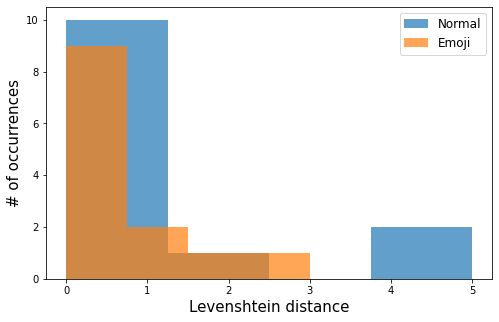

In [12]:


# Select the levenshtein distance values for emoji mode and normal mode
emoji_levenshteins = scores.loc[scores['mode'] == 'Emoji', 'levenshteins']
normal_levenshteins = scores.loc[scores['mode'] == 'Normal', 'levenshteins']

# Plot histograms
plt.subplots(figsize = (8,5))
plt.hist(normal_levenshteins, bins=4, alpha=0.7, label='Normal')
plt.hist(emoji_levenshteins, bins=4, alpha=0.7, label='Emoji')

plt.legend(loc='upper right', fontsize = 12)
plt.xlabel('Levenshtein distance', fontsize = 15)
plt.ylabel('# of occurrences', fontsize = 15)
plt.show()

In [13]:

print(scores["levenshteins"].mean())
print((statistics.stdev(scores["levenshteins"]))) #

0.8076923076923077
1.3570329625836146


In [21]:
scores['strength'] = 'MEDIUM'
scores.loc[scores['group'] == "1", 'strength'] = 'STRONG'
scores.loc[scores['group'] == "3", 'strength'] = 'STRONG'
# Split the data by mode and strength
emoji_medium= scores[(scores['mode'] == 'Emoji') & (scores['strength'] == 'MEDIUM')]['levenshteins']
emoji_strong = scores[(scores['mode'] == 'Emoji') & (scores['strength'] == 'STRONG')]['levenshteins']
normal_medium = scores[(scores['mode'] == 'Normal') & (scores['strength'] == 'MEDIUM')]['levenshteins']
normal_strong = scores[(scores['mode'] == 'Normal') & (scores['strength'] == 'STRONG')]['levenshteins']

# Check if each group is normally distributed using Shapiro-Wilk test
stat_emoji_medium, p_emoji_medium = shapiro(emoji_medium)
stat_emoji_strong, p_emoji_strong = shapiro(emoji_strong)
stat_normal_medium, p_normal_medium = shapiro(normal_medium)
stat_normal_strong, p_normal_strong = shapiro(normal_strong)
print("Shapiro:")
print(f"Emoji Medium: stat={stat_emoji_medium:.3f}, p={p_emoji_medium:.3f}")
print(f"Emoji Strong: stat={stat_emoji_strong:.3f}, p={p_emoji_strong:.3f}")
print(f"Normal Medium: stat={stat_normal_medium:.3f}, p={p_normal_medium:.3f}")
print(f"Normal Strong: stat={stat_normal_strong:.3f}, p={p_normal_strong:.3f}")

emoji_data = scores[scores['mode'] == 'Emoji']['levenshteins']
normal_data = scores[scores['mode'] == 'Normal']['levenshteins']

# Compare the groups using Mann-Whitney U test
stat_emoji, p_emoji = mannwhitneyu(emoji_medium, emoji_strong)
stat_normal, p_normal = mannwhitneyu(normal_medium, normal_strong)
stat_bm, p_bm = mannwhitneyu(emoji_data, normal_data)

print(f"Mann-Whitney U test:")
print(f"Emoji: stat={stat_emoji:.3f}, p={p_emoji:.3f}")
print(f"Normal: stat={stat_normal:.3f}, p={p_normal:.3f}")
print(f"Emoji vs Normal: stat={stat_bm:.3f}, p={p_bm:.3f}")


# Compare all groups using Kruskal-Wallis test
stat, p = kruskal(emoji_medium, emoji_strong, normal_medium, normal_strong)
stat_mode, p_mode = kruskal(emoji_data, normal_data)
stat_m, p_m = kruskal(emoji_medium, normal_medium)
stat_s, p_s = kruskal(emoji_strong, normal_strong)
print(f"Kruskal-Wallis test (all groups): stat={stat:.3f}, p={p:.3f}")
print(f"Kruskal-Wallis test (emoji vs normal): stat={stat_mode:.3f}, p={p_mode:.3f}")
print(f"Kruskal-Wallis test (medium): stat={stat_m:.3f}, p={p_m:.3f}")
print(f"Kruskal-Wallis test (high): stat={stat_s:.3f}, p={p_s:.3f}")


Shapiro:
Emoji Medium: stat=0.600, p=0.000
Emoji Strong: stat=0.702, p=0.007
Normal Medium: stat=0.640, p=0.001
Normal Strong: stat=0.836, p=0.091
Mann-Whitney U test:
Emoji: stat=18.000, p=0.662
Normal: stat=13.000, p=0.241
Emoji vs Normal: stat=70.000, p=0.410
Kruskal-Wallis test (all groups): stat=2.708, p=0.439
Kruskal-Wallis test (emoji vs normal): stat=0.727, p=0.394
Kruskal-Wallis test (medium): stat=0.032, p=0.859
Kruskal-Wallis test (high): stat=0.732, p=0.392


In [119]:
# Disregard!
# 
from scipy.stats import ttest_ind

# extract the data for the two modes
emoji_data = scores[scores['mode'] == 'Emoji']['levenshteins']
normal_data = scores[scores['mode'] == 'Normal']['levenshteins']

# perform the t-test
t_statistic, p_value = ttest_ind(emoji_data, normal_data)

# print the results
print('t-statistic: ', t_statistic)
print('p-value: ', p_value)

t-statistic:  -1.0121216546949474
p-value:  0.32157563989993776
